# Sampling the Imaginary

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pymc3 as pm

Calculating the vampire example:

$\text{Pr(vampire|positive)} = \frac{\text{Pr(positive|vampire)Pr(vampire)}}{\text{Pr(positive)}}$

###### Code 3.1

In [2]:
# Pr(positive|vampire)
PrPV = 0.95

# Pr(positive|mortal)
PrPM = 0.01

# P(Vampire)
PrV = 0.001

# Pr(positive)
PrP = PrPV * PrV + PrPM * (1 - PrV)

# Pr(vampire|positive)
PrVP = (PrPV * PrV) / PrP
print(PrVP)

0.08683729433272395


### Sampling from a grid-approximate prior

###### Code 3.2

In [3]:
# Generating posterior for globe tossing model
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(6, 9, p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

###### Code 3.3

In [4]:
# Draw samples from plausible fractions of water with probability as posterior probability
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)

###### Figure 3.1

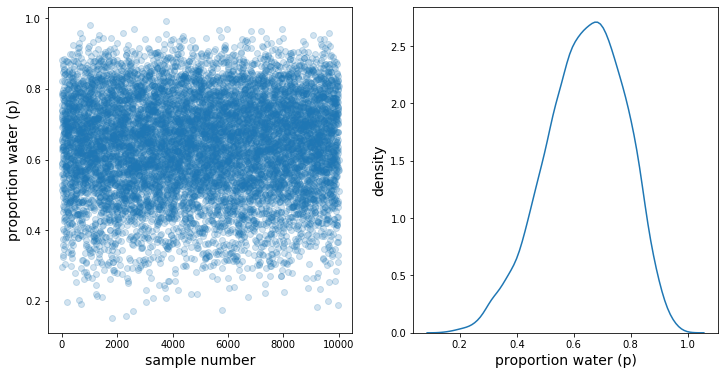

In [5]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

### Sampling to Summarize

#### Intervals of defined boundaries

###### Code 3.6

In [6]:
# posterior probability where p < 0.5. (Using true values)
posterior[p_grid < 0.5].sum()

0.17187458902022873

###### Code 3.7

In [7]:
# posterior probability where p < 0.5. (Using simulated values)
sum(samples < 0.5) / 10000

0.1628

###### Code 3.8

In [8]:
# posterior probability where probability lies between 0.5 and 0.75
sum((samples > 0.5) & (samples < 0.75)) / 10000

0.6057

###### Figure 3.2

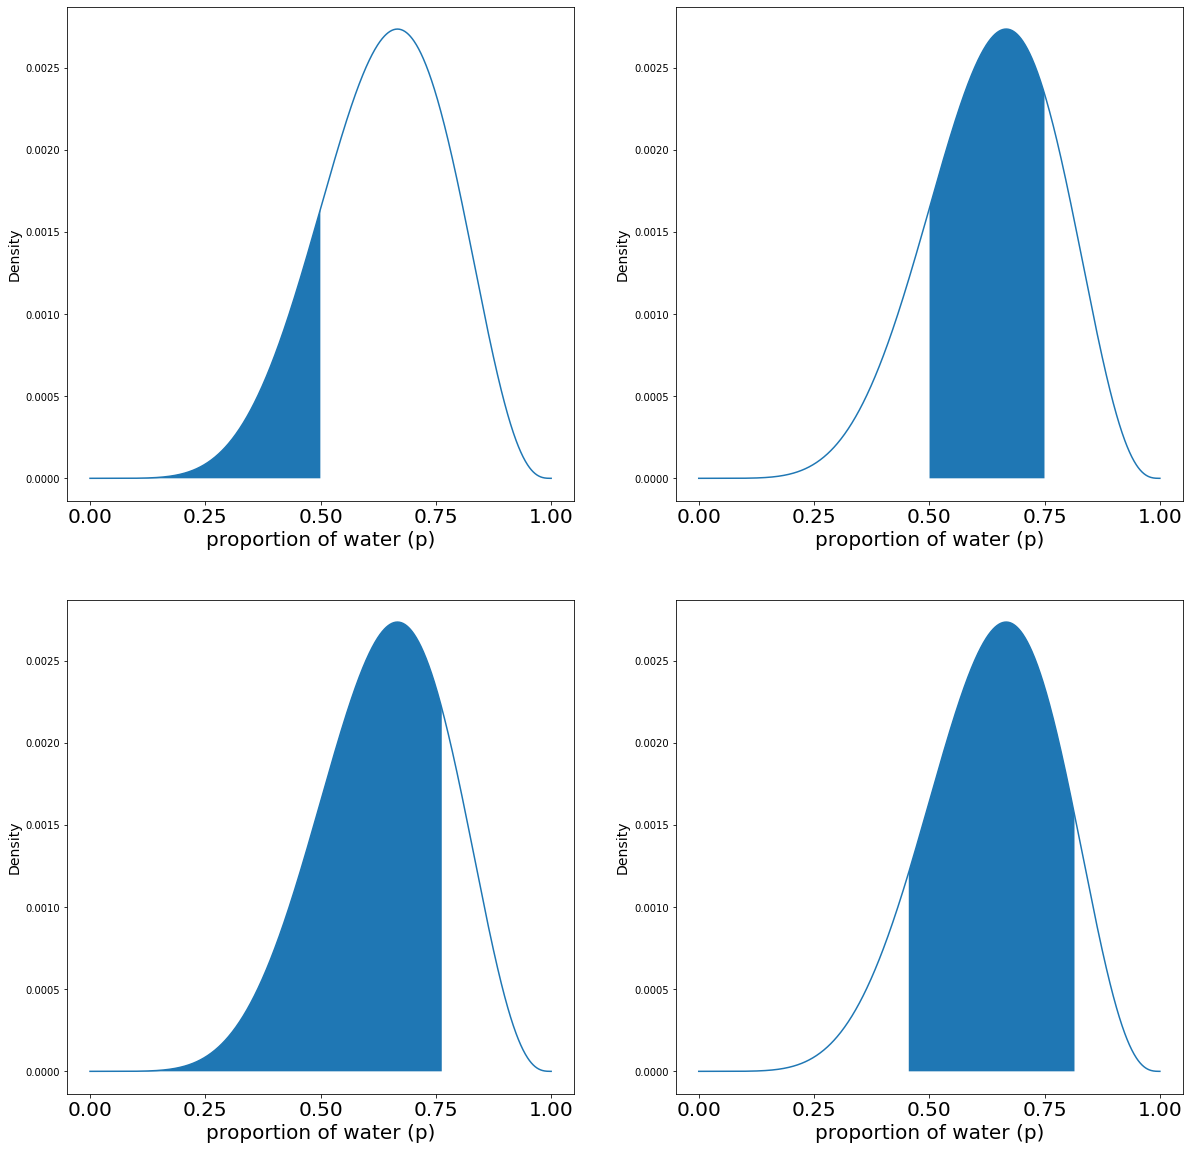

In [9]:
# plotting out intervals of defined boundaries: 

# wider figure
plt.figure(figsize=(20,20)) 

### Intervals of defined boundaries:

# plot p < 0.5
plt.subplot(2, 2, 1)
plt.plot(p_grid, posterior)
plt.xlabel('proportion of water (p)', fontsize=20)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,0.25,0.50,0.75,1.00], fontsize=20)
plt.fill_between(p_grid, posterior, where = p_grid < 0.5)

# plot 0.5 < p < 0.75
plt.subplot(2, 2, 2)
plt.plot(p_grid, posterior)
plt.xlabel('proportion of water (p)', fontsize=20)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,0.25,0.50,0.75,1.00], fontsize=20)
plt.fill_between(p_grid, posterior, where = (p_grid > 0.5) & (p_grid < 0.75))

### Intervals of defined mass:

# plot lower 80% posterior probability
plt.subplot(2, 2, 3)
plt.plot(p_grid, posterior)
plt.xlabel('proportion of water (p)', fontsize=20)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,0.25,0.50,0.75,1.00], fontsize=20)
plt.fill_between(p_grid, posterior, where = p_grid < np.percentile(samples, 80))

# plot 0.5 < p < 0.75
perc = np.percentile(samples, [10, 90])
plt.subplot(2, 2, 4)
plt.plot(p_grid, posterior)
plt.xlabel('proportion of water (p)', fontsize=20)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,0.25,0.50,0.75,1.00], fontsize=20)
plt.fill_between(p_grid, posterior, where= (p_grid > perc[0]) & (p_grid < perc[1]))

#### Intervals of defined mass

###### Code 3.9

In [10]:
np.percentile(samples, 0.8)

0.2912912912912913

###### Code 3.10

In [11]:
np.percentile(samples, [10, 90])

array([0.45445445, 0.81581582])

###### Code 3.11

In [12]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(3, 3, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

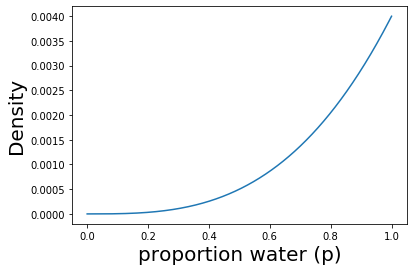

In [13]:
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=20)
plt.ylabel('Density', fontsize=20);

###### Code 3.12

In [14]:
# Percentile Interval
np.percentile(samples, [25, 75])

array([0.70770771, 0.93193193])

###### Code 3.13

In [15]:
# Highest Posterior density interval
pm.stats.hpd(samples, 0.5)

array([0.84284284, 1.        ])

###### Figure 3.3

Text(0.5, 1.0, '50% HPDI')

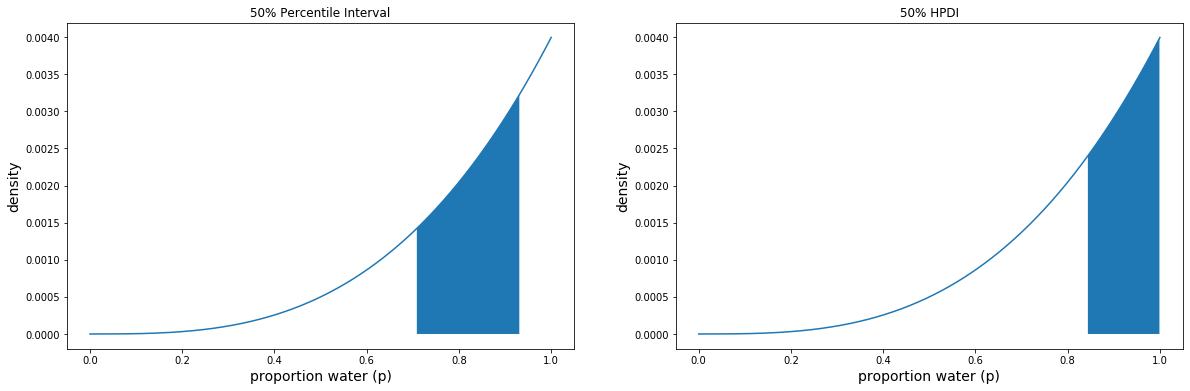

In [16]:
# wider figure
plt.figure(figsize=(20,6)) 

# 50% PI
pi_interval = np.percentile(samples, [25, 75])

# PI Plot
plt.subplot(1, 2, 1)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.fill_between(p_grid, posterior, where = (p_grid > pi_interval[0]) & (p_grid < pi_interval[1]))
plt.title('50% Percentile Interval')

# 50% HPDI
hpdi = pm.stats.hpd(samples, 0.5)

# PI Plot
plt.subplot(1, 2, 2)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.fill_between(p_grid, posterior, where = (p_grid > hpdi[0]) & (p_grid < hpdi[1]))
plt.title('50% HPDI')

#### Point Estimates

###### Code 3.14

In [17]:
# Value with Highest posterior. Maximum a posteriori
p_grid[posterior.argmax()]

1.0

###### Code 3.15

In [18]:
stats.mode(samples)[0]

array([0.96396396])

###### Code 3.16

In [19]:
print(samples.mean())
print(np.percentile(samples, 50))

0.8005366366366367
0.8428428428428428


###### Code 3.17

In [20]:
# Loss function at one plausible water fraction
np.sum(np.abs(0.5 - p_grid) * posterior)

0.31287518749981214

###### Code 3.18

In [21]:
# Loss function at each point of plausible fraction
loss = np.vectorize(lambda x: np.sum(np.abs(x - p_grid) * posterior))(p_grid)

###### Code 3.19

In [22]:
p_grid[loss.argmin()]

0.8408408408408409

###### Figure 3.4

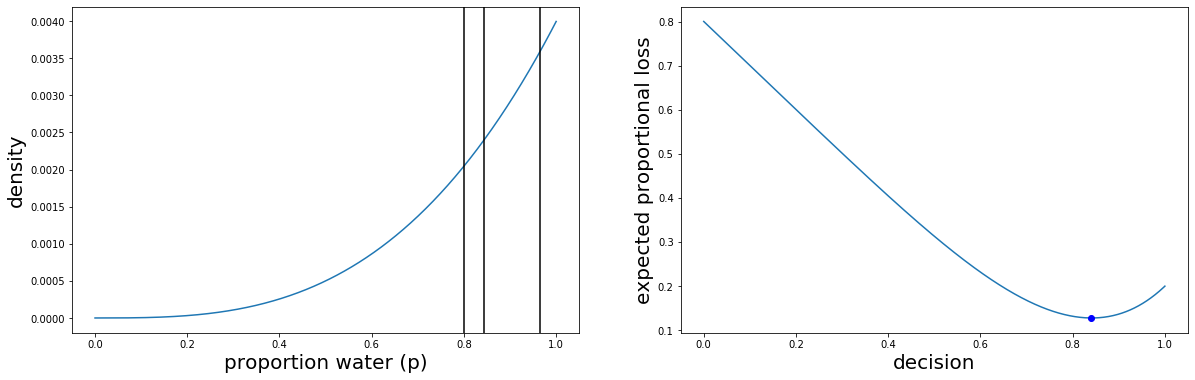

In [23]:
# wider figure
plt.figure(figsize=(20,6)) 

# PI Plot
plt.subplot(1, 2, 1)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=20)
plt.ylabel('density', fontsize=20)
plt.axvline(samples.mean(), color='black')
plt.axvline(np.percentile(samples, 50), color='black')
plt.axvline(stats.mode(samples)[0], color='black')

# PI Plot
plt.subplot(1, 2, 2)
plt.plot(p_grid, loss)
plt.xlabel('decision', fontsize=20)
plt.ylabel('expected proportional loss', fontsize=20)
plt.plot(p_grid[loss.argmin()], loss.min(), 'bo',)

### Sampling to Simulate prediction

#### Dummy Data

###### Code 3.20

In [24]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

###### Code 3.21

In [25]:
stats.binom.rvs(size=1, n=2, p=0.7)

array([1])

###### Code 3.22

In [26]:
stats.binom.rvs(size=10, n=2, p=0.7)

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1])

###### Code 3.23

In [27]:
dummy_w = stats.binom.rvs(size=int(1e5), n=2, p=0.7)

pd.DataFrame(np.unique(dummy_w, return_counts=True)[1]).T / 1e5

,0,1,2
0,0.09134,0.41952,0.48914


###### Code 3.24

In [28]:
dummy_w = stats.binom.rvs(size=int(1e5), n=9, p=0.7)

###### Figure 3.5

(array([4.0000e+00, 3.4000e+01, 3.8800e+02, 2.0750e+03, 7.3090e+03,
        1.7272e+04, 2.6424e+04, 2.6827e+04, 1.5552e+04, 4.1150e+03]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

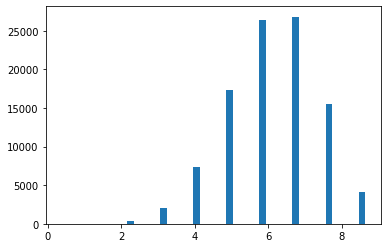

In [29]:
plt.hist(dummy_w, bins=10, rwidth=0.2)

#### Model Checking

###### Code 3.25

In [30]:
w = stats.binom.rvs(size=int(1e4), n=9, p=0.6)

###### Code 3.26

In [31]:
w = stats.binom.rvs(size=int(1e4), n=9, p=samples)

###### Figure 3.6

/Users/hamzaiqb/.pyenv/versions/miniconda3-4.3.30/envs/statrethinking/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


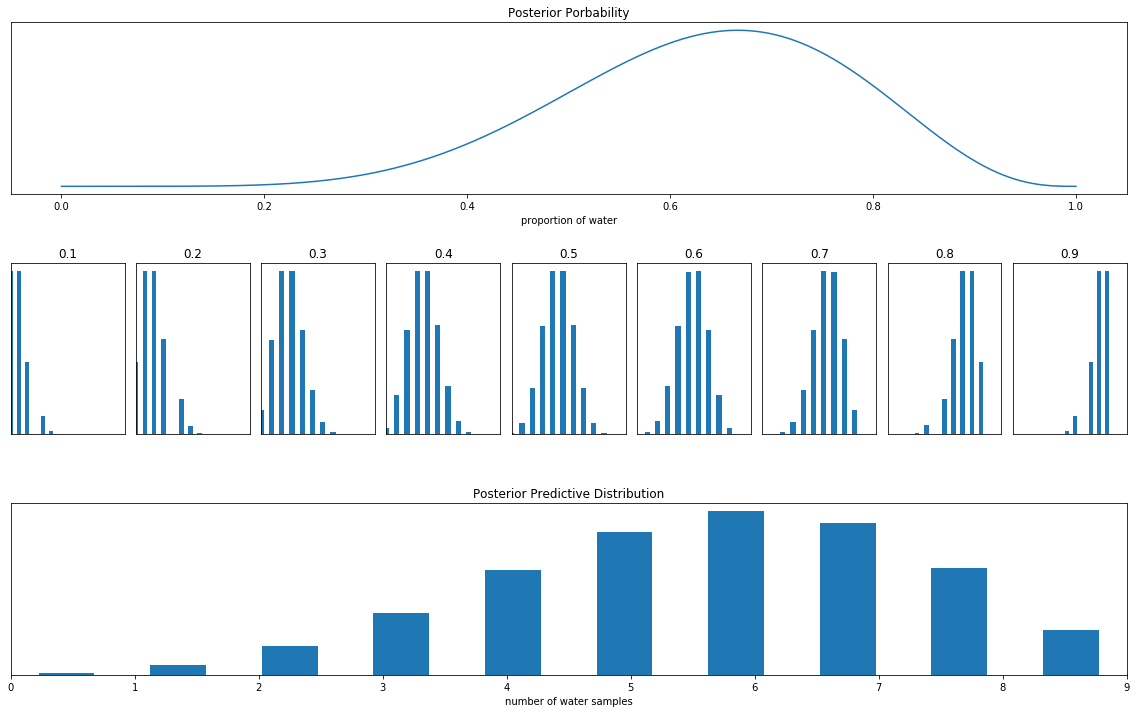

In [32]:
fig = plt.figure(figsize=(20, 12))
outer = gridspec.GridSpec(3, 1, wspace=0.2, hspace=0.4)

# Generating posterior for globe tossing model
p_grid = np.linspace(0, 1, int(1e6))
prior = np.repeat(1, int(1e6))
likelihood = stats.binom.pmf(k=6, n=9, p=p_grid)
ways = likelihood * prior
posterior = ways / ways.sum()

inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
ax1 = plt.Subplot(fig, inner1[0])
ax1.plot(p_grid, posterior)
ax1.set_title('Posterior Porbability')
ax1.set_xlabel('proportion of water')
ax1.set_yticks([])
fig.add_subplot(ax1)

inner2 = gridspec.GridSpecFromSubplotSpec(1, 9, subplot_spec=outer[1], wspace=0.1)
for i in range(1, 10):
    ax = plt.Subplot(fig, inner2[i-1])
    dummy_w = stats.binom.rvs(size=int(1e6), n=9, p=i/10)
    ax.hist(dummy_w, rwidth=0.5, align='left')
    ax.set_xlim([0,10])
    ax.set_title('{p}'.format(p=i/10))
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

# Draw samples from plausible fractions of water with probability as posterior probability
samples = np.random.choice(p_grid, size=int(1e6), p=posterior, replace=True)
w = stats.binom.rvs(size=int(1e6), n=9, p=samples)

inner3 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[2])
ax2 = plt.Subplot(fig, inner3[0])
ax2.hist(w, bins=10, rwidth=0.5)
ax2.set_title('Posterior Predictive Distribution')
ax2.set_xlabel('number of water samples')
ax2.set_yticks([])
ax2.set_xlim([0,9])
fig.add_subplot(ax2)

fig.show()

###### Figure 3.7

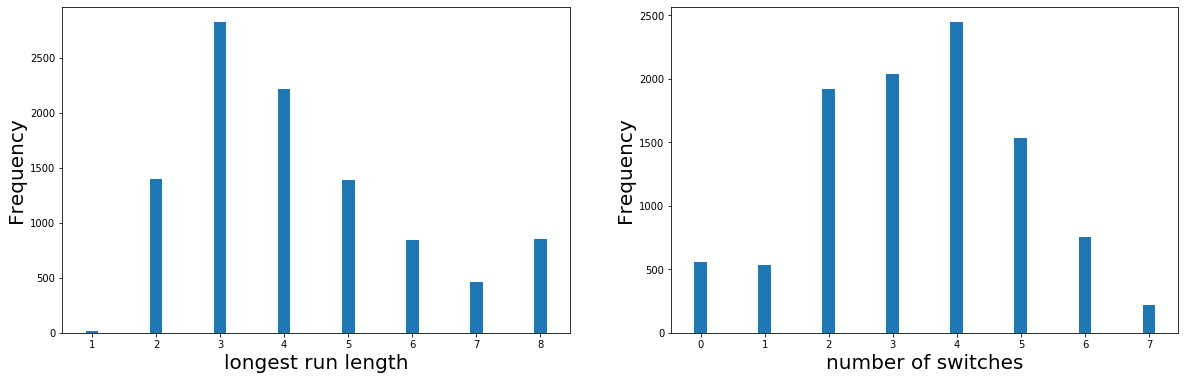

In [35]:
# Define all possible values of water fractions
samples = np.random.choice(p_grid, size=int(1e4), p=posterior, replace=True)
probs=np.column_stack((samples,1-samples))

# Get multiple simulations of 9 globe tosses
sim_f = lambda p: np.random.choice(np.array([0,1]), size=9, replace=True, p=p)
simulations = np.apply_along_axis(sim_f, axis=1,arr=probs)

# wider figure
plt.figure(figsize=(20,6)) 

# Plot longest run of water or land
length_counter = lambda y: y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
max_water_length = pd.DataFrame(simulations).apply(length_counter, axis=1).max(axis=1)
max_land_length = pd.DataFrame(np.int8(simulations == 0)).apply(length_counter, axis=1).max(axis=1)
max_length_of_land_or_water = np.column_stack((max_water_length,max_land_length)).max(axis=1)

plt.subplot(1, 2, 1)
plt.hist(max_length_of_land_or_water, bins=range(1,10), rwidth=0.2, align='left')
plt.xlabel('longest run length', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

# Plot of number of switches between land and water
number_of_switches = np.sum(np.diff(simulations, axis=1) != 0, axis=1)
plt.subplot(1, 2, 2)
plt.hist(number_of_switches, rwidth=0.2, bins=range(9), align='left')
plt.xlabel('number of switches', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.show();